# Indus Valley Scripts - ICIT coded Text Analysis for Decipherment 

# Distribution Analysis

This file uses the cleanup data i.e pickled dataframes and does a Text ditribution analysis
Dataset was created as a csv file from ICIT web site from raw html files for each for the Text
Data labels were changes and a linearized copy of the original text was added

icit_text_text_corpus.csv


In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import collections
import traceback


#plt.style.use(style='seaborn')
plt.style.use("seaborn-v0_8")
%matplotlib inline

In [2]:
"""" UnPickle the dataframes """
df_text_unigrams = pd.read_pickle('pickle/all_unigrams_freq.pkl')
print("Unigram Frequency df: \n", df_text_unigrams)

df_text_bigrams = pd.read_pickle('pickle/all_bigrams_freq.pkl')
print("Bigram Frequency df: \n", df_text_bigrams)

df_text_trigrams = pd.read_pickle('pickle/all_trigrams_freq.pkl')
print("Trigram Frequency df: \n", df_text_trigrams)

Unigram Frequency df: 
     ICIT_Sign  Frequency
0         740       1005
1         002        496
2         032        245
3         400        237
4         220        232
..        ...        ...
593       020          1
594       376          1
595       570          1
596       828          1
597       723          1

[598 rows x 2 columns]
Bigram Frequency df: 
      ICIT_Sign  Frequency
0      002 861        115
1      002 817        108
2      400 740         88
3      002 820         71
4      090 740         70
...        ...        ...
2842   066 828          1
2843   723 066          1
2844   002 905          1
2845   041 705          1
2846   031 820          1

[2847 rows x 2 columns]
Trigram Frequency df: 
         ICIT_Sign  Frequency
0     740 390 590         31
1     741 060 920         27
2     740 100 415         24
3     690 435 255         23
4     740 032 840         23
...           ...        ...
3540  723 066 828          1
3541  705 002 905          1
3542  0

# Zipf-Mandelbrot Law

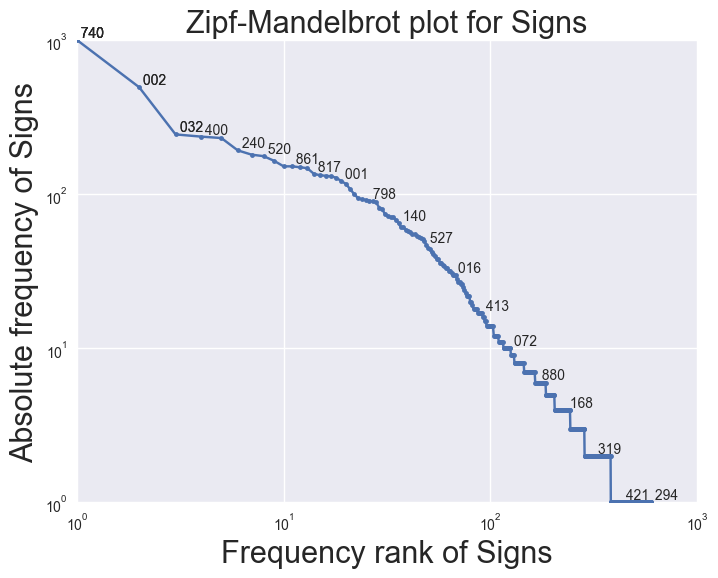

In [3]:
"""Zipf Law
Unigram
"""

# Thank You: 
# https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-3-zipfs-law-data-visualisation-fc9eadda71e7
from pylab import *

counts = df_text_unigrams.Frequency
tokens = df_text_unigrams.ICIT_Sign
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

plt.figure(figsize=(8,6))
plt.ylim(1,10**3)
plt.xlim(1,10**3)
loglog(ranks, frequencies, marker=".")
title("Zipf-Mandelbrot plot for Signs", fontsize=22)
xlabel("Frequency rank of Signs", fontsize=22)
ylabel("Absolute frequency of Signs", fontsize=22)
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    no = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
    

plt.savefig("images/zipf-Unigram.png")
plt.show()
    

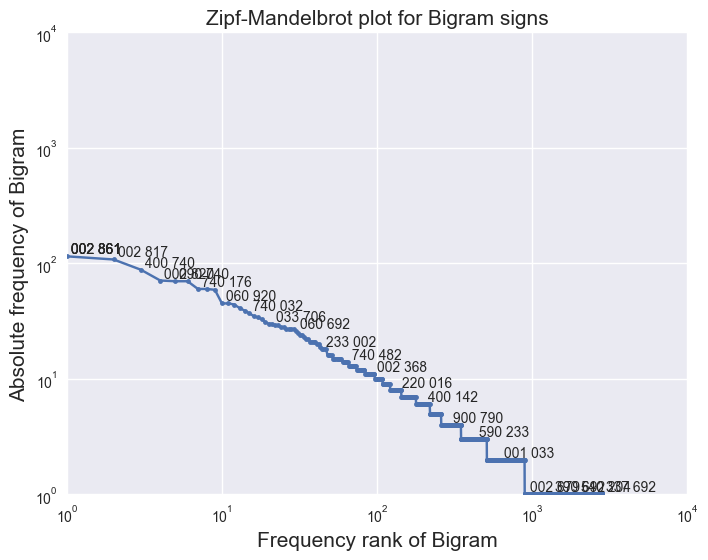

In [4]:
"""Zipf Law
Bigram
"""
from pylab import *

counts = df_text_bigrams.Frequency
tokens = df_text_bigrams.ICIT_Sign
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

plt.figure(figsize=(8,6))
plt.ylim(1,10**4)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
title("Zipf-Mandelbrot plot for Bigram signs",fontsize=15)
xlabel("Frequency rank of Bigram",fontsize=15)
ylabel("Absolute frequency of Bigram",fontsize=15)
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    no = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")